# 1

To estimate approximate error:                                             (i)Define approximate error: $$\epsilon_{app}=|\delta(I)=|I_{anal}-I_{simpsons}|$$ 




(ii) Find $I_{Simpsons}$ by expanding the integrand $f(x)$ at a generic midpoint $x_{i}$ in the simpsons rule integral limits $[x_{i-1},x_{i+1}] \subset [a,b]$.Defining interval $h=\frac{b-a}{N}$, where $N$ is odd

Expanding $f(x)$ at $x_i$:
$$f(x)=\sum_{j=0}^{N}\frac{f^{(j)}(x_i)}{j!}(x-x_i)^j$$

The integral then becomes:
$$I_{simpsons}=\int_{x_{i-1}}^{x_{i+1}}dx \sum_{j=0}^{N}\frac{f^{(j)}(x_i)}{j!}(x-x_i)^j$$

Which then becomes:
    $$I_{simpsons}=\int_{x_{i-1}}^{x_{i+1}}dx \sum_{j=0}^{N}\frac{f^{(j)}(x_i)}{(j+1)!}(x-x_i)^{j+1}$$ Known (1): $x_{i\pm 1}-x_i= \pm h$  $$I_{Simpsons}=\sum_{j=0}^{N}\frac{f^{(j)}(x_i)}{(j+1)!}(x-x_i)^{j+1}\biggl|_{x_{i-1}}^{x_{i+1}}$$ From Known (1), we can see that all the even powers of $h$ will vanish, thus:
    
 $$I_{Simpsons}=2\sum_{j=0}^{N}\frac{f^{(2j)}(x_i)}{(2j+1)!}(h)^{2j+1}$$
 $$I_{Simpsons}=2\biggl[f(x_i)h+\frac{f^{(2)}(x_i)}{3!}h^3+\frac{f^{(4)}(x_i)}{5!}h^5)\biggl]$$

(iii) Define $I_{anal}=\int_{x_{i-1}}^{x_{i+1}}dx f(x)=\int_{x_{i-1}}^{x_{i+1}}dx (ax^2+bx+c)=\frac{a}{3}x^3+\frac{b}{2}x^2+cx\biggl|_{x_{i-1}}^{x_{i+1}}$, even powers cancel out, thus,  $I_{anal}=\frac{a}{3}(x_{i+1}^3-x_{i-1}^3)+c(x_{i+1}-x_{i-1})$. Using Known(1),$\frac{a}{3}((h+x_i)^3-(-h+x_i)^3)+c((h+x_i)-(-h+x_i))=\frac{2a}{3}h^3+2ch$

(iv)Thus, for one arbitrary base interval:$\delta I=-K\frac{f^{(4)}(x_i)}{5!}h^5$ $\frac{|\delta I|}{K}=\frac{f^{(4)}(x_i)}{5!}h^5=\frac{f^{(4)}(x_i)}{5!}(\frac{b-a}{N})^5$. Then, for N intervals in range $[a,b]$ it becomes, $\frac{f^{(4)}(x_i)}{5!}(\frac{(b-a)^{5}}{N^4})$.
Where, $K=\frac{4}{3}$

(v)In the language of Newman, $f^{4}(x_i)=\frac{f^{(3)}(x_{i-h})-f^{(3)}{(x_{i+h})}}{h}$. Keeping the negative sign intact in the error term. 
Then,$e_{app}=K\delta I_{Simpsons}=\frac{h^4}{90}[f^{(3)}(x_{i-h})-f^{(3)}(x_{i+h})]$. which can then be extrapolated to $[a,b]$ as,$e_{app}=\frac{h^4}{90}[f^{(3)}(x_{a})-f^{(3)}(x_{b})]$

In the case of relative error, such that values of $I_{anal}$ and the fourth derivative will be similar, because considering a very small h the lower powers will dominate. Thus,$ \kappa \frac{f^{4}}{I}\sim 1$.

Then, $\epsilon_{app, rel} \sim \frac{(b-a)^5}{N^4}$

# 2

## A

In [627]:
from numpy import*


In [628]:
def fu(x):
    y=2*x**5-3*x**3+5*x**2-7
    return y
    

In [629]:
def trap_intg(a,b,n):
    h=(b-a)/(n-1) #spacing
    sum=(fu(a)+fu(b))/2 #first-last-term 
    for i in range(1,n-1):#everything in between for loop
        sum+=fu(a+i*h)
    return h*sum #scale with h
        

In [630]:
print("trapezoid integral value is=",trap_intg(-1,1,1200))

trapezoid integral value is= -10.66666202931135


Analytical integral:
$$\int_{-1}^{1}f(x)dx=\frac{1}{3}x^6-\frac{3}{4}x^4+\frac{5}{3}x^3-7x\biggl|_{-1}^{1}=-10.66666666666666$$ 


## B

In [631]:
print("e_app=",abs(-10.66666666666666666666666 - trap_intg(-1,1,1200)))

e_app= 4.637355315750824e-06


Trapezoid formalism error suggests:
$$e_{app,tr}=\frac{(b-a)^2}{12 N^2}(f^{(1)}(a)-f^{1}(b))$$

In [632]:
print('e_app,tr=',abs((2)**2)/(12*(1200**2))*(20))

e_app,tr= 4.6296296296296296e-06


In [680]:
print("difference in predicted error vs found error in $10^{-6}$,=",abs(-(4.6296296296296296)+(4.637355315750824)))

difference in predicted error vs found error in $10^{-6}$,= 0.007725686121194286


In the case of the Computed error the round off error pitches in calculation thus it is always going to be a tad bit higher depending on the number of steps: $\epsilon_{ro}=\sqrt{N}\epsilon_{machine precision}$

## C

In [634]:
def Simp_intg(a,b,N):
    if N%2==0:
        print("even numbers not accepted.")
        
    else:
        N=N+1
        h=(b-a)/(N)
        sum=(fu(a)+fu(b)) #adding first,last and midpoint terms
        for i in range(1,N-1,2):
            #now the loop is in 4,2 mode skipping every other i
            #till N-2th i
            sum+=(4*fu(a+i*h))+2*(fu(a+(i+1)*h))
       
   
        return (h/3)*(sum + 4*fu(a+((N-1)*h)))#added the second last term with a 4
print(Simp_intg(-1,1,2401))

-10.666666666666664


The $\epsilon_{app,simp}$ is:

In [635]:
print("e_app=",abs(-10.66666666666666666666666 - Simp_intg(-1,1,2401)))

e_app= 1.7763568394002505e-15


Which is almost equal to the machine precision. Now the theoretical error is: $f^{(3)}(\pm 1)=102$, then 

In [636]:
print('e_app,simp=',abs((2)**4)/(90*(2401**4))*(0))

e_app,simp= 0.0


In [637]:
print("difference in predicted error vs found error in $10^{-6}$,=",-(1.7763568394002505e-15)+(0))

difference in predicted error vs found error in $10^{-6}$,= -1.7763568394002505e-15


Again the error is due to the the round off error that occurs during computation proptional to $\sqrt{N}$

## 3

In [810]:
def f(x): #defining function
    exp=2.7182818284590452353602874
    return (((x**4)*(exp**x))/((exp**x)-1)**2)
    
    
    
    

In [811]:
def gaussleg_int(a,b,N):
    x,w=np.polynomial.legendre.leggauss(N)#generating weights 
    x1=(0.5*(b-a)*x)+(0.5*(b+a))
    w1=0.5*(b-a)*w

    qutr=0.0#integral
    for i in range(N):
        qutr+=w1[i]*(f(x1[i]))
    return qutr 
    

In [812]:
gaussleg_int(0,428/500,50)

0.201610213274742

In [813]:
 #boltzmann
def Cv(T):
    k=1.380649e-23 #boltzmann
    v=0.001#m^3
    p=6.022e28#number density
    Deb=428#Kelvin
    return((9)*v*p*k*((T/Deb)**3)*gaussleg_int(0,Deb/T,50))
    
    

In [814]:
print('Cv=',Cv(500),"JK^-1")

Cv= 2405.2364588488904 JK^-1


In [815]:
import matplotlib
import matplotlib.pyplot as plt


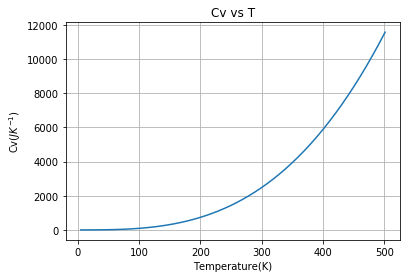

In [816]:
T=linspace(5,501)
y=Cv(T)

fig, ax = plt.subplots()
ax.plot(T, y)
ax.set(xlabel='Temperature(K)',ylabel='Cv($JK^{-1})$',title="Cv vs T")
plt.grid()
plt.show()

## 4

In each of the cases if we take $x=k\sin(\phi)$, then $\phi=\arcsin(\frac{x}{k})$ and $d\phi=(k\cos(\arcsin(\frac{x}{k}))^{-1} dx $
Thus, $$g(x)=(k\cos(\arcsin(\frac{x}{k}))$$ and $$W_1(x)=\frac{1}{\sqrt{1-x^2}}$$ and $$W_2(x)=\sqrt{1-x^2}$$
The integrals then become:

$$E(k)=\int_{0}^{k} dx W_2(x)g(x)$$
$$K(k)=\int_{0}^{k} dx W_1(x)g(x)$$

The integral in form for Gauss-Chebyshev quadrature. However, the limits are not in scale. Thus, we can find weights from $[-1,1]$ and scale them to $[0,k]$ in the form:

$$x_i=\frac{k-0}{2} + \frac{k-0}{2}*x'_i$$
$$W_i=\frac{k-0}{2}*W_i'$$

In [1245]:

from scipy import special

In [1193]:
def k(theta,a,r):
    
    return (np.lib.scimath.sqrt((4*a*r*np.sin(theta))/(a**2 + r**2 + 2*a*r)))

np.sqrt wont give me complex values so used np.lib.scimath.sqrt

In [1194]:
def f1(x,theta,a,r): #the g(x) same for both integrals
     return (1/(k(theta,a,r)*np.cos(np.arcsin(x/k(theta,a,r)))))

In [1195]:
def gausscheb_intK(b,N,theta,a,r):
    c=k(theta,a,r)
    x,w=np.polynomial.chebyshev.chebgauss(N)#weights and points generator first kind
    x1=0.5*(c-b)+0.5*(c-b)*x#scaling to what we [o,k]
    w1=0.5*(c-b)*w
    quad=0.0
    for i in range(N):
        quad+=w1[i]*f1(x1[i],theta,a,r)
         
    return quad   
                                    
    



In [1196]:
def gausscheb_intE(b,N,theta,a,r):
    c=k(theta,a,r)
    x3,w3=special.roots_chebyu(N)#second king weights and points gen
    x2=0.5*(c-b)+0.5*(c-b)*x3 #scaling
    w2=0.5*(c-b)*w3
    quad=0.0
    for i in range(N):
        quad+=w2[i]*f1(x2[i],theta,a,r)
         
    return quad   
    
    

In [1240]:
def A(r,theta): #composing A
    U=(4*4*2)/((2**2)+(r**2)+(2*2*r*np.sin(theta)))
    Y=(U/(k(theta,2,r)**2))*(((2-(k(theta,2,r)*k(theta,2,r)))*gausscheb_intK(0,100,theta,2,r))-(2*gausscheb_intE(0,100,theta,2,r)))
    return Y  
       
       

In [1241]:
V=[] #straight plot wouldnt work so i made arrays
for i in np.arange(1,100,0.2):
    V.append(A(i,2*pi/3))

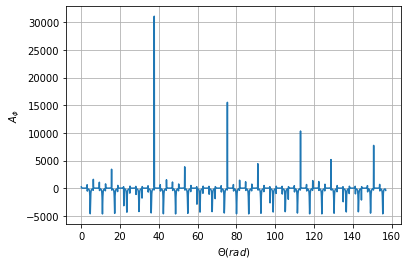

In [1248]:
n=[]
for i in np.arange(0.1,50*pi,0.1):
    n.append(A(2.3,i).real)
x=np.arange(0.1,50*pi,0.1)
y=n

fig, ax = plt.subplots()
ax.plot(x,y)
ax.set(xlabel='$\Theta(rad)$',ylabel='$A_{\phi}$')
plt.grid()
plt.show()
  

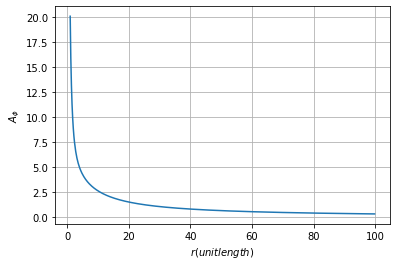

In [1243]:
x=np.arange(1,100,0.2)
y=V
fig, ax = plt.subplots()
ax.set(xlabel='$r(unit length)$',ylabel='$A_{\phi}$')
ax.plot(x,y)
plt.grid()
plt.show()

C:\Users\vanda\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


nan

C:\Users\vanda\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


(nan+nanj)